# Dense Neutral Network

## Import the data

In [60]:
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt 
import numpy as np

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11493376/11490434 [==============================] - 3s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [77]:
# inverting colours
x_train = -(x_train - 256)
x_test = -(x_test - 256)

Text(0.5, 1.0, 'it is 4')

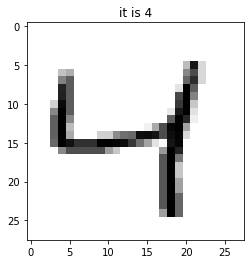

In [78]:
plt.imshow(x_train[2], cmap='gray')
a = 'it is ' + str(y_train[2])
plt.title(a)

## Preprocessing

In [79]:
# flattening
x_train_flat = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test_flat = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [80]:
#normalising pixels to (0, 1)
x_train_flat = x_train_flat.astype('float32')
x_test_flat = x_test_flat.astype('float32')
x_train_flat /= 255
x_test_flat /= 255

In [81]:
# labels as vectors
y_train_cat = np_utils.to_categorical(y_train, 10)
y_test_cat = np_utils.to_categorical(y_test, 10)

In [82]:
y_test_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Model

In [83]:
from keras.models import Sequential
from keras.layers import Dense

In [84]:
model = Sequential()

In [85]:
model.add(Dense(512, input_shape=(784,), activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [86]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Training

In [88]:
model.fit(x_train_flat, y_train_cat, epochs = 10, batch_size=128, verbose = 1)

Epoch 1/10
469/469 [==============================] - 8s 16ms/step - loss: 0.4900 - accuracy: 0.8513
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.2411 - accuracy: 0.9259
Epoch 3/10
469/469 [==============================] - 7s 16ms/step - loss: 0.1846 - accuracy: 0.9430
Epoch 4/10
469/469 [==============================] - 6s 14ms/step - loss: 0.1500 - accuracy: 0.9530
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1342 - accuracy: 0.9578 0s - l
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1208 - accuracy: 0.9619
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1063 - accuracy: 0.9656
Epoch 8/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0964 - accuracy: 0.9692
Epoch 9/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0912 - accuracy: 0.9703
Epoch 10/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0857 -

## Testing

In [89]:
model.evaluate(x_test_flat, y_test_cat,verbose = 1)

313/313 [==============================] - 1s 3ms/step - loss: 0.1064 - accuracy: 0.9667


[0.10637268424034119, 0.96670001745224]

Text(0.5, 1.0, 'it is 5')

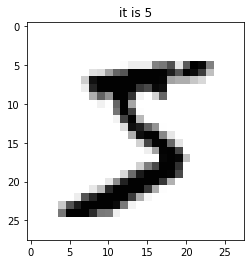

In [99]:
plt.imshow(x_train[0], cmap='gray')
a = 'it is ' + str(y_train[0])
plt.title(a)

In [100]:
np.argmax(model.predict(x_train[0].reshape(1, 784)))

5

## Actual Testing

In [111]:
from PIL import Image

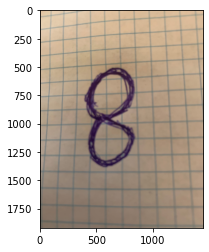

In [152]:
img = Image.open('eight.jpg')
image_array = np.array(img)
plt.imshow(image_array)

In [153]:
def resize_image(name):
    img = Image.open(name)
    width, height = img.size
    square_side = min(width, height)
    
    img = img.crop((np.ceil(width-square_side)/2,
                   np.ceil(height-square_side)/2,
                   np.ceil(width+square_side)/2,
                   np.ceil(height+square_side)/2,)).convert('L')
    
    img.thumbnail((28, 28))
    
    img = img.point(lambda x: 0 if x<128 else 255, '1')
    np_array = np.array(img)/255
    plt.imshow(img)
    np_array =  np_array.reshape(1,  np_array.shape[0] * np_array.shape[1])
    
    return np_array

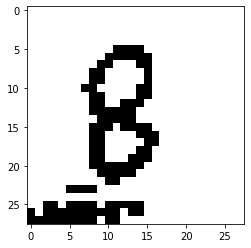

In [154]:
X = resize_image('eight.jpg')

In [155]:
np.argmax(model.predict(X))

8